In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pickle



In [3]:
# Load the dataset
df = pd.read_csv('loan_approval_data.csv')

# Display the first few rows of the dataframe
df.sample(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
147,lp001518,male,yes,1.0,graduate,no,1538,1425.0,30.0,360.0,1.0,urban,y
574,lp002863,male,yes,3.0,graduate,no,6406,0.0,150.0,360.0,1.0,semiurban,n
497,lp002588,male,yes,0.0,graduate,no,4625,2857.0,111.0,12.0,NaN,urban,y
362,lp002175,male,yes,0.0,graduate,no,4750,2333.0,130.0,360.0,1.0,urban,y
192,lp001657,male,yes,0.0,not graduate,no,6033,0.0,160.0,360.0,1.0,urban,n


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [5]:
df.describe()


,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [41]:
#Missing Values
df.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [8]:
for column in ['gender', 'married', 'dependents', 'self_employed', 'loanamount', 'loan_amount_term', 'credit_history']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [10]:
#Dropping redundant values
redundant_columns = ['loan_id']  
df.drop(columns=redundant_columns, inplace=True)

In [11]:
df.sample(5)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
331,male,no,0.0,graduate,no,2935,0.0,98.0,360.0,1.0,semiurban,y
61,male,yes,3.0,graduate,no,3029,0.0,99.0,360.0,1.0,urban,y
296,male,yes,1.0,graduate,no,6875,0.0,200.0,360.0,1.0,semiurban,y
88,male,no,0.0,graduate,no,8566,0.0,210.0,360.0,1.0,urban,y
457,male,yes,0.0,graduate,no,3708,2569.0,173.0,360.0,1.0,urban,n


C:\Users\Dell\AppData\Local\Temp\ipykernel_4172\936610513.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_4172\936610513.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_4172\936610513.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_4172\936610513.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_4172\936610513.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


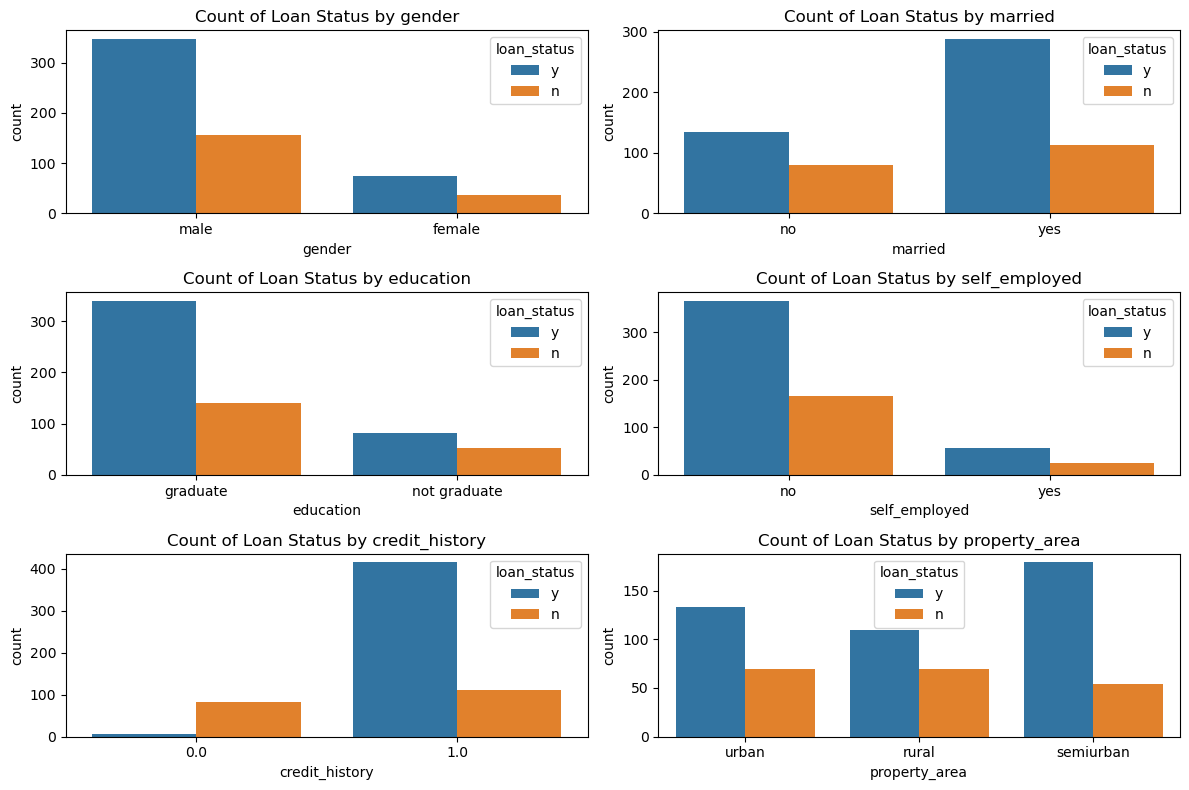

In [12]:
# List of categorical features
categorical_features = ['gender', 'married', 'education', 'self_employed', 'credit_history', 'property_area']

# Set the size of the plots
plt.figure(figsize=(12, 8))

# Loop through each categorical feature and create a count plot
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i) # Adjust the grid size based on the number of features
    sns.countplot(x=feature, hue='loan_status', data=df)
    plt.title('Count of Loan Status by {}'.format(feature))
    plt.tight_layout()

plt.show()

In [13]:
##Encoding the data manually

# Define encoding dictionaries for categorical features
encoding_dicts = {
    'gender': {'male': 0, 'female': 1},
    'married': {'yes': 1, 'no': 0},
    'education': {'graduate': 1, 'not graduate': 0},  
    'self_employed': {'yes': 1, 'no': 0},
    'property_area': {'rural': 0, 'urban': 1, 'semiurban': 2}  
}

# Apply encoding to each categorical feature
for column, encoding_dict in encoding_dicts.items():
    df[column] = df[column].replace(encoding_dict)

# Updated dataset
df.sample(5)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
583,0,1,1.0,1,0,1880,0.0,61.0,360.0,1.0,0,n
65,0,1,0.0,1,0,5726,4595.0,258.0,360.0,1.0,2,n
217,0,1,0.0,1,0,3727,1775.0,131.0,360.0,1.0,2,y
263,1,0,0.0,1,0,7200,0.0,120.0,360.0,1.0,0,y
591,0,1,2.0,1,1,6000,0.0,205.0,240.0,1.0,2,n


In [14]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [35]:
## Split the data in to train and test 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


In [36]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Model building 
rf =  LogisticRegression(max_iter=1000)
rf.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [38]:
# Make predictions on the training and test data
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)


In [39]:
accuracy_train = accuracy_score(y_train, y_train_pred)
acuracy_test = accuracy_score(y_test, y_test_pred)

print("accuracy_score of  train:", accuracy_train)
print("accuracy of  test:", acuracy_test)

accuracy_score of  train: 0.8041958041958042
accuracy of  test: 0.8324324324324325


In [40]:
## Pickle of the model 
import pickle 
pickle.dump(rf,open('model.pkl','wb'))

## Read
model = pickle.load(open('model.pkl','rb'))